# American Time User Survey Analysis and Employment Status Prediction

__By:__ _Vedprakash_ _Sahu_

### Table of Contents:
#### Data Description
#### Exploratory Data Analysis
1. Data Preparation
2. Feature Distribution 
3. Feature Importance Plot
4. Feature Selection

#### Model Design and Analysis
1. Models implemented
    - Random Forest
    - Logistic Regression
    - Artificial Neural Network
    - SVM
    - Adaboost
2. Model prediction
3. Comparison of errors: Train vs Validation

#### Discussion

#### Prediction on the final model

##### Instructions:
- Please set the path to dataset file before running the code
- Need to install imblearn package
- Be patient, it will take around half an hour to run the complete code

In [1]:
# Import libraries 
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn import svm
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix

from IPython.display import Image

import itertools

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
sys.version

'3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]'

### Data Description

#### It is an employment related data and the final task is to predict the employment status for the test set

#### Dataset consists of the following fields
    • ID: An Id that represents a person within the training set
    • Education: It represents Education level of a person (9th, 10th, 11th, 12th grade, Associate, bachelor’s, master’s degree etc.)
    • Age: Age of a person
    • Age range: Age Range of a person (0-19, 20-29, 30-39………70-79, 80+)
    • Employment: Whether that person is employed or not
    • Children: Number of children a person has
    • Weekly earnings: Earnings in dollars/week
    • Column k- Column x: Average time spend by a person on a particular activity per day in minutes
    • Total: Total of average time spend (In hours) by a person in a day.
    Note: values of this column may exceed above 24hrs (2 activities may have been considered twice). Like Food & drink prep is considered individually as well as in housework (Assumption)

In [4]:
# Set the path where the data file is located
os.chdir("E:/Comp")
os.getcwd()

'E:\\Comp'

In [5]:
## Load Train data
data_xls = pd.read_excel('Training Dataset.xlsx', index_col=None)  # Load the .xlsx file
data_xls.to_csv('Train_set.csv', encoding='utf-8', index=False)    # Convert .xlsx to .csv file 
train_df = pd.read_csv("Train_set.csv")                            # Read Train_set.csv file
train_df.head()

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,...,0,0,0,40,180,120,0,0,0,24.000000
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,40,...,20,0,120,40,15,15,0,0,0,21.583333
2,3,Master,47,40-49,Employed,Male,0,904,2005,40,...,0,0,15,85,214,199,0,0,0,17.733333
3,4,Some College,21,20-29,Employed,Female,0,320,2005,40,...,0,0,105,30,240,240,0,0,0,26.833333
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,...,0,0,0,35,600,40,0,0,0,23.750000


In [6]:
#Checking missing values in the training dataset
train_df.isnull().sum()

Id                        0
Education Level           0
Age                       0
Age Range                 0
Employment Status         0
Gender                    0
Children                  0
Weekly Earnings           0
Year                      0
Weekly Hours Worked       0
Sleeping                  0
Grooming                  0
Housework                 0
Food & Drink Prep         0
Caring for Children       0
Playing with Children     0
Job Searching             0
Shopping                  0
Eating and Drinking       0
Socializing & Relaxing    0
Television                0
Golfing                   0
Running                   0
Volunteering              0
Total                     0
dtype: int64

In [7]:
# Converting hours into mins since most of the variables are in minutes
df = train_df
df['Weekly Hours Worked'] = df['Weekly Hours Worked'].apply(lambda x: x*60)  
df['Total'] = df['Total'].apply(lambda x: x*60)
df.head()

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,...,0,0,0,40,180,120,0,0,0,1440.0
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,2400,...,20,0,120,40,15,15,0,0,0,1295.0
2,3,Master,47,40-49,Employed,Male,0,904,2005,2400,...,0,0,15,85,214,199,0,0,0,1064.0
3,4,Some College,21,20-29,Employed,Female,0,320,2005,2400,...,0,0,105,30,240,240,0,0,0,1610.0
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,...,0,0,0,35,600,40,0,0,0,1425.0


In [8]:
df.describe()

,Id,Age,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,Grooming,Housework,Food & Drink Prep,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
count,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,...,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000,64006.000000
mean,32003.500000,46.260569,0.891291,485.697872,2008.500109,1470.527763,522.240368,40.591116,41.246618,34.287879,...,8.498172,1.700606,24.668234,68.652189,288.137925,165.160735,1.293191,0.686201,9.831953,1236.918070
std,18477.085002,17.396500,1.146851,639.891303,2.291258,1336.495027,135.669820,36.713372,82.483654,53.508507,...,39.001215,20.706929,49.144949,52.639850,206.163299,168.431664,18.539409,7.421383,49.762815,371.661981
min,1.000000,15.000000,0.000000,0.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16002.250000,33.000000,0.000000,0.000000,2007.000000,0.000000,445.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,30.000000,125.000000,30.000000,0.000000,0.000000,0.000000,950.000000
50%,32003.500000,45.000000,0.000000,240.000000,2009.000000,1800.000000,510.000000,30.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,60.000000,250.000000,120.000000,0.000000,0.000000,0.000000,1230.000000
75%,48004.750000,59.000000,2.000000,769.000000,2010.750000,2400.000000,600.000000,60.000000,55.000000,50.000000,...,0.000000,0.000000,30.000000,90.000000,414.000000,240.000000,0.000000,0.000000,0.000000,1490.000000
max,64006.000000,85.000000,12.000000,2885.000000,2012.000000,9600.000000,1423.000000,1043.000000,1405.000000,995.000000,...,840.000000,983.000000,879.000000,895.000000,1434.000000,1380.000000,600.000000,505.000000,1127.000000,2800.000000


In [9]:
# Plot pairwise relationships in a dataset
temp = df
#sns.pairplot(temp, hue="Employment Status")

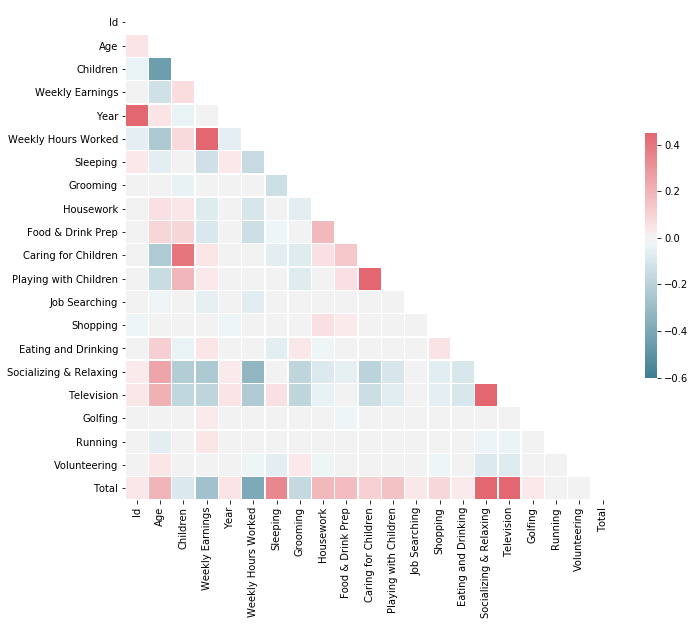

In [10]:
# Compute the correlation matrix
corr = temp.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax = 0.45, vmin =-0.6)

In [11]:
# As mentioned in the dataset some activities are considered twice and also from the above correlation matrix, so we are taking the max of similar activities
df['Household Activity'] = df[['Housework', 'Food & Drink Prep']].max(axis=1)
df['Primary Children Activity'] = df[['Caring for Children','Playing with Children']].max(axis=1)
df['Socializing Activity'] = df[['Socializing & Relaxing', 'Television']].max(axis=1)
df[['Housework', 'Food & Drink Prep','Household Activity']].head()     # An example that displays the above consideration

,Housework,Food & Drink Prep,Household Activity
0,150,45,150
1,150,60,150
2,1,0,1
3,90,135,135
4,205,15,205


In [12]:
# Dropping the correlated variables and non-predictors
df.drop(df[['Id','Age Range','Year','Housework','Food & Drink Prep','Caring for Children','Playing with Children','Socializing & Relaxing','Television']],axis=1, inplace=True)

In [13]:
# Checking the info (data types) after dropping some variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 19 columns):
Education Level              64006 non-null object
Age                          64006 non-null int64
Employment Status            64006 non-null object
Gender                       64006 non-null object
Children                     64006 non-null int64
Weekly Earnings              64006 non-null int64
Weekly Hours Worked          64006 non-null int64
Sleeping                     64006 non-null int64
Grooming                     64006 non-null int64
Job Searching                64006 non-null int64
Shopping                     64006 non-null int64
Eating and Drinking          64006 non-null int64
Golfing                      64006 non-null int64
Running                      64006 non-null int64
Volunteering                 64006 non-null int64
Total                        64006 non-null float64
Household Activity           64006 non-null int64
Primary Children Activity    64006 n

In [14]:
X = df[['Education Level','Gender']]
#X.head(3)

In [15]:
# We can see attribute 'Education' has 11 different levels
X['Education Level'].value_counts()

High School         17917
Bachelor            13042
Some College        11881
Associate Degree     6080
Master               5377
11th grade           2440
10th grade           2390
9th grade            2080
Prof. Degree         1059
Doctoral Degree       984
12th grade            756
Name: Education Level, dtype: int64

In [16]:
# To plot feature importance as well as to plot the distribution of each attributes, label Encoding is performed for categorical attributes
df_plt = df
df_plt = df_plt.select_dtypes(exclude=['number']) \
                .apply(LabelEncoder().fit_transform)\
                .join(df_plt.select_dtypes(include=['number']))
df_plt.head()

,Education Level,Employment Status,Gender,Age,Children,Weekly Earnings,Weekly Hours Worked,Sleeping,Grooming,Job Searching,Shopping,Eating and Drinking,Golfing,Running,Volunteering,Total,Household Activity,Primary Children Activity,Socializing Activity
0,7,2,0,51,0,0,0,825,80,0,0,40,0,0,0,1440.0,150,0,180
1,5,0,0,42,2,1480,2400,500,10,0,120,40,0,0,0,1295.0,150,365,15
2,8,0,1,47,0,904,2400,480,70,0,15,85,0,0,0,1064.0,1,0,214
3,10,0,0,21,0,320,2400,705,65,0,105,30,0,0,0,1610.0,135,0,240
4,7,1,0,49,0,0,0,470,60,0,0,35,0,0,0,1425.0,205,0,600


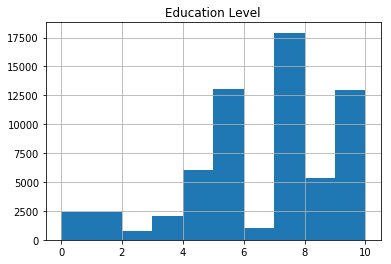

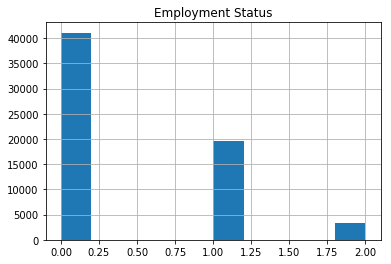

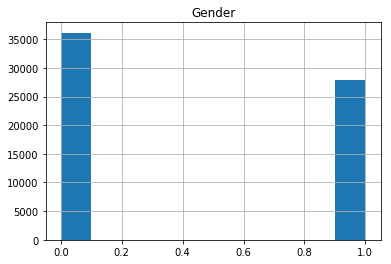

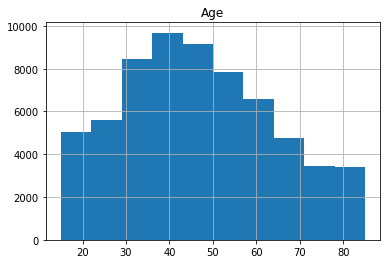

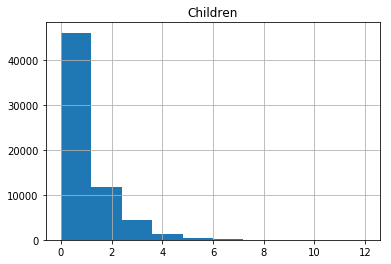

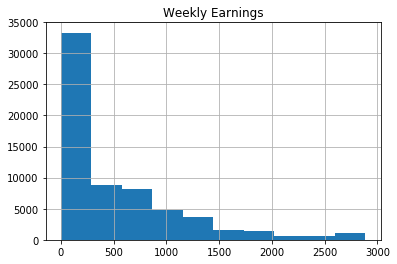

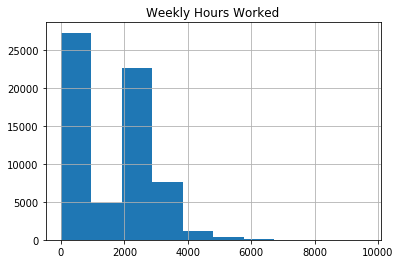

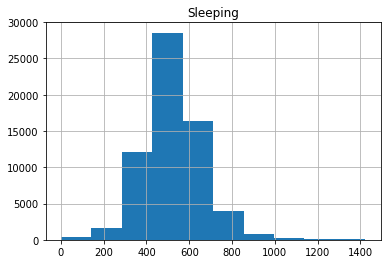

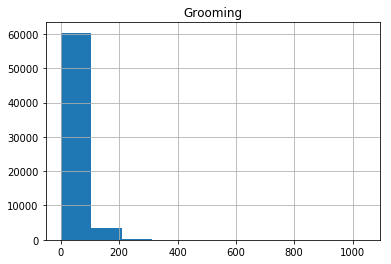

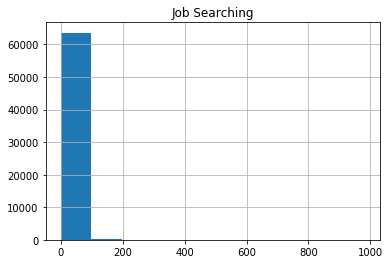

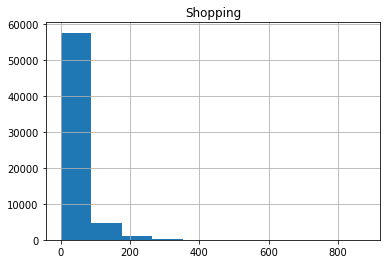

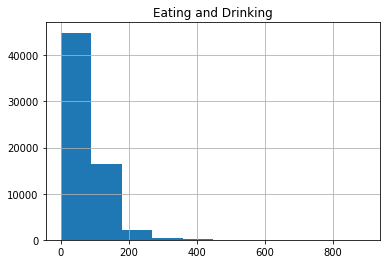

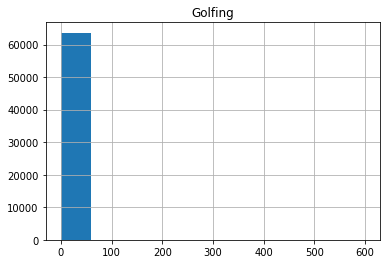

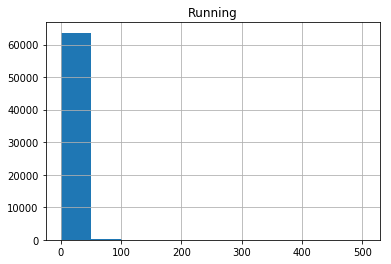

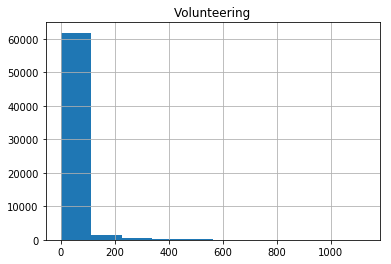

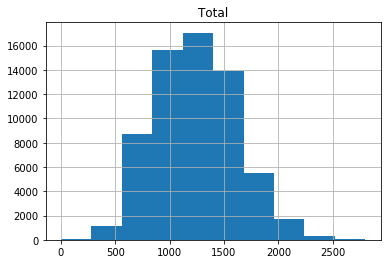

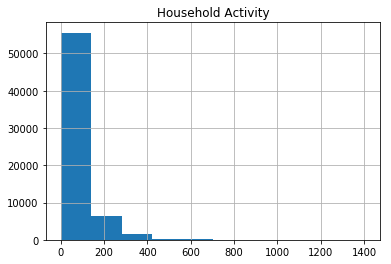

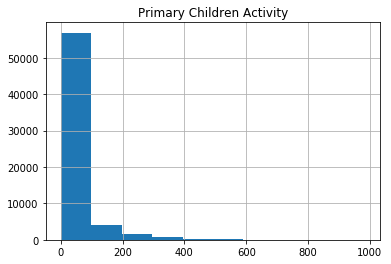

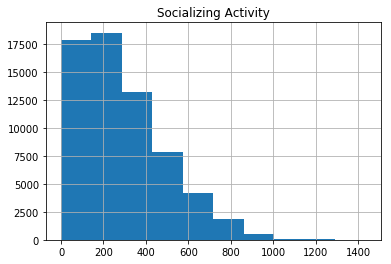

In [17]:
cols= df_plt.columns
for i in cols:
 df_plt.hist(i)
 plt.show()

# Plot Feature Importance 

In [18]:
y_t = df_plt.pop('Employment Status')
X_t = df_plt

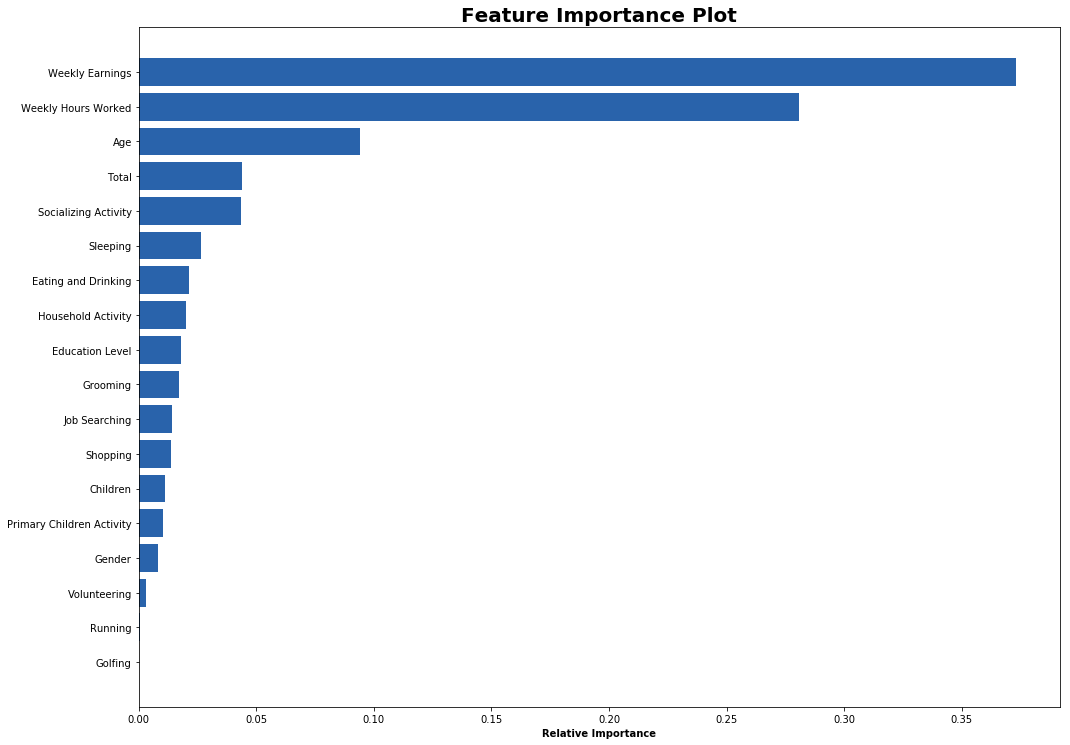

In [19]:
clf_random = RandomForestClassifier(random_state=122, criterion = 'entropy')
clf_random.fit(X_t,y_t)
features = X_t.columns
importances = clf_random.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance Plot',fontsize=20,fontweight="bold")
plt.barh(range(len(indices)), importances[indices], color='#2963ab', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance',fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(16.5, 12.5, forward=True)
plt.show()

In [20]:
# We can see a few variables are unable to explain the dependent variable. So, we will drop these variables as well.
df.drop(df[['Volunteering','Running','Golfing']],axis=1, inplace=True)

In [21]:
# Checking the info (data types) after dropping some variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 16 columns):
Education Level              64006 non-null object
Age                          64006 non-null int64
Employment Status            64006 non-null object
Gender                       64006 non-null object
Children                     64006 non-null int64
Weekly Earnings              64006 non-null int64
Weekly Hours Worked          64006 non-null int64
Sleeping                     64006 non-null int64
Grooming                     64006 non-null int64
Job Searching                64006 non-null int64
Shopping                     64006 non-null int64
Eating and Drinking          64006 non-null int64
Total                        64006 non-null float64
Household Activity           64006 non-null int64
Primary Children Activity    64006 non-null int64
Socializing Activity         64006 non-null int64
dtypes: float64(1), int64(12), object(3)
memory usage: 7.8+ MB


In [22]:
print(df["Employment Status"].value_counts())
print(df["Employment Status"].value_counts(normalize=True))

Employed              41098
Not in labor force    19630
Unemployed             3278
Name: Employment Status, dtype: int64
Employed              0.642096
Not in labor force    0.306690
Unemployed            0.051214
Name: Employment Status, dtype: float64


#### As we can notice that the data set does not have equal number of instances in each class, i.e. there exists a class imbalance.
#### Unemployed class has just 5% of the instances and Employed class has large number of instances (64%). So the accuracy will definitely be higher in this case. 
#### One way to handle this is to use boosting algorithm, which we tried implementing - adaboost: even though the accuracy was the highest among different models (without over/under sampling), but the error rate for Unemployed class was high. 
#### We assigned the different weights in case of SVM and Logistic regression with k-fold cross validation, that also didn't perform well.
#### So, after trying out different models, since it's a class imbalance problem, finally we have implemented "SMOTETomek" to make the dataset balanced.

In [23]:
# Generate dummies for "Education Level" and "Gender"
Ed_G = df[['Education Level','Gender']]
Ed_G = pd.get_dummies(Ed_G)
df_enc = df.select_dtypes(exclude=['object']) \
                .join(Ed_G)
df_enc = df_enc.join(df['Employment Status'])
df_enc.head()

,Age,Children,Weekly Earnings,Weekly Hours Worked,Sleeping,Grooming,Job Searching,Shopping,Eating and Drinking,Total,...,Education Level_Associate Degree,Education Level_Bachelor,Education Level_Doctoral Degree,Education Level_High School,Education Level_Master,Education Level_Prof. Degree,Education Level_Some College,Gender_Female,Gender_Male,Employment Status
0,51,0,0,0,825,80,0,0,40,1440.0,...,0,0,0,1,0,0,0,1,0,Unemployed
1,42,2,1480,2400,500,10,0,120,40,1295.0,...,0,1,0,0,0,0,0,1,0,Employed
2,47,0,904,2400,480,70,0,15,85,1064.0,...,0,0,0,0,1,0,0,0,1,Employed
3,21,0,320,2400,705,65,0,105,30,1610.0,...,0,0,0,0,0,0,1,1,0,Employed
4,49,0,0,0,470,60,0,0,35,1425.0,...,0,0,0,1,0,0,0,1,0,Not in labor force


In [24]:
# Perform Label Encoding to Target Variable
df_enc = df_enc.select_dtypes(exclude=['number']) \
                .apply(LabelEncoder().fit_transform)\
                .join(df_enc.select_dtypes(include=['number']))
df_enc = pd.DataFrame(df_enc)
df_enc.head()

,Employment Status,Age,Children,Weekly Earnings,Weekly Hours Worked,Sleeping,Grooming,Job Searching,Shopping,Eating and Drinking,...,Education Level_9th grade,Education Level_Associate Degree,Education Level_Bachelor,Education Level_Doctoral Degree,Education Level_High School,Education Level_Master,Education Level_Prof. Degree,Education Level_Some College,Gender_Female,Gender_Male
0,2,51,0,0,0,825,80,0,0,40,...,0,0,0,0,1,0,0,0,1,0
1,0,42,2,1480,2400,500,10,0,120,40,...,0,0,1,0,0,0,0,0,1,0
2,0,47,0,904,2400,480,70,0,15,85,...,0,0,0,0,0,1,0,0,0,1
3,0,21,0,320,2400,705,65,0,105,30,...,0,0,0,0,0,0,0,1,1,0
4,1,49,0,0,0,470,60,0,0,35,...,0,0,0,0,1,0,0,0,1,0


In [25]:
#Filter independent variables and dependent variable
cols = df_enc.shape[1]
X = df_enc.iloc[:,1:cols]                                                      
y = df_enc.iloc[:,0:cols-(cols-1)]

#The following function performs over-sampling using SMOTE and cleaning using Tomek links to generate less noise data to eradicate class imbalance
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=111)
X_res, y_res = smt.fit_sample(X, y)
from collections import Counter
print('Resampled dataset size {}'.format(sorted(Counter(y_res).items())))

Resampled dataset size [(0, 41048), (1, 41027), (2, 41067)]


In [26]:
X_res.shape

(123142, 26)

In [27]:
y_res = np.reshape(y_res,(len(y_res),1))
y_res.shape

(123142, 1)

##### Scaling the variables using MinMaxScaler
Various attributes have different range of values they take.Hence, it is important that we bring all the attributes on the same scale. For this purpose we use MinMax Scaler from sklearn library.

__MinMaxScaler__ 
This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one. This transformation is often used as an alternative to zero mean, unit variance scaling.

The transformation is given by:
```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min
```
where min, max = feature_range.

In [28]:
scaler = MinMaxScaler()
scaled_X_res = scaler.fit_transform(X_res)
#Train and valid splits
X_train,X_valid,y_train,y_valid = train_test_split(scaled_X_res,y_res,test_size=0.25, random_state = 5555)

### Function to plot confusion matrix

In [29]:
sns.set_style('white')

## Confusion Matrix
class_names = ['Employeed', 'Not in labor force', 'Unemployeed']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Models

## Random Forest

In [30]:
clf_ran = RandomForestClassifier(random_state=122, criterion = 'entropy')
clf_ran.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=122, verbose=0, warm_start=False)

_____________________________________________________________
Accuracy score on train data: 0.996665
Accuracy score on valid data: 0.927662
Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     10309
          1       0.89      0.89      0.89     10206
          2       0.89      0.90      0.90     10271

avg / total       0.93      0.93      0.93     30786

_____________________________________________________________


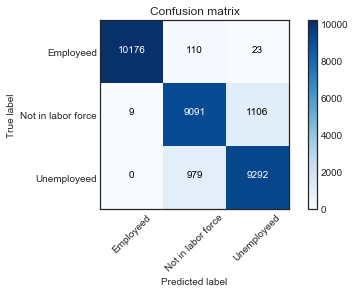

In [31]:
y_pred_ran_train = clf_ran.predict(X_train)
y_pred_ran_valid = clf_ran.predict(X_valid)

acc_ran_train = metrics.accuracy_score(y_train, y_pred_ran_train)
acc_ran_valid = metrics.accuracy_score(y_valid, y_pred_ran_valid)
rp_ran = metrics.classification_report(y_valid, y_pred_ran_valid)
print("_____________________________________________________________")
print("Accuracy score on train data: {:5f}".format(acc_ran_train))
print("Accuracy score on valid data: {:5f}".format(acc_ran_valid))
print("Classification Report:")
print(rp_ran)
print("_____________________________________________________________")

# Compute confusion matrix
cnf_mat = confusion_matrix(y_valid, y_pred_ran_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_mat, classes=class_names,
                      title='Confusion matrix')
plt.show()

## Logistic Regression

In [32]:
fold = KFold(len(y_train), n_folds=10, shuffle=True, random_state=777)
logit = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=fold
        ,random_state=777
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='newton-cg')
log_model = logit.fit(X_train,y_train)

In [33]:
print("__________________________________________")
print("Max auc_roc score: {}".format(log_model.scores_[1].max()))
print("Best mean auc_roc score: {:.4f}".format(log_model.scores_[1].mean(axis=0).max()))
print("__________________________________________")

__________________________________________
Max auc_roc score: 0.9220141556200394
Best mean auc_roc score: 0.9187
__________________________________________


_____________________________________________________________
Accuracy score on train data: 0.835755
Accuracy score on valid data: 0.838271
Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     10309
          1       0.76      0.75      0.76     10206
          2       0.75      0.77      0.76     10271

avg / total       0.84      0.84      0.84     30786

_____________________________________________________________


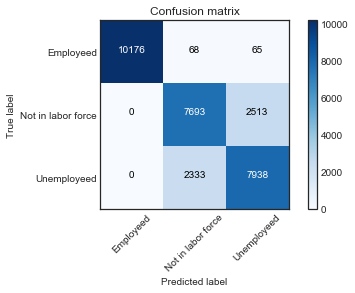

In [34]:
y_pred_train = log_model.predict(X_train)
y_pred_valid = log_model.predict(X_valid)

acc_train = metrics.accuracy_score(y_train, y_pred_train)
acc_valid = metrics.accuracy_score(y_valid, y_pred_valid)
rp = metrics.classification_report(y_valid, y_pred_valid)
print("_____________________________________________________________")
print("Accuracy score on train data: {:5f}".format(acc_train))
print("Accuracy score on valid data: {:5f}".format(acc_valid))
print("Classification Report:")
print(rp)
print("_____________________________________________________________")

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_valid, y_pred_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
plt.show()

## Artificial Neural Network

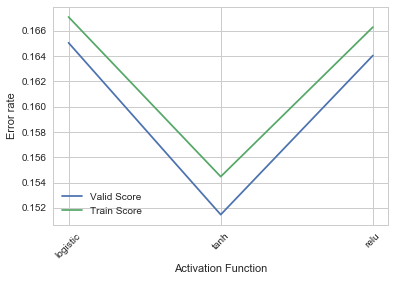

In [35]:
from sklearn.neural_network import MLPClassifier
activation_fn = ['logistic', 'tanh', 'relu']
error_valid = []
error_train = []

for i in range(0, len(activation_fn)):
    ann_clf = MLPClassifier(solver='lbfgs', activation = activation_fn[i], alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=777)
    ann_clf.fit(X_train, y_train)  
    
    error_valid.append(zero_one_loss(y_valid, ann_clf.predict(X_valid)))
    error_train.append(zero_one_loss(y_train, ann_clf.predict(X_train)))

sns.set(style="whitegrid")
plt.plot(error_valid)
plt.plot(error_train)
tick_marks = np.arange(len(activation_fn))
plt.xticks(tick_marks, activation_fn, rotation=45)
plt.xlabel("Activation Function")
plt.ylabel('Error rate')
plt.legend(['Valid Score', 'Train Score'])

In [36]:
ann_clf = MLPClassifier(solver='lbfgs', activation = 'tanh', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=777)
ann_clf.fit(X_train, y_train)  

MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=777,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

_____________________________________________________________
Accuracy score on train data: 0.845533
Accuracy score on valid data: 0.848535
Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     10309
          1       0.81      0.71      0.76     10206
          2       0.74      0.84      0.79     10271

avg / total       0.85      0.85      0.85     30786

_____________________________________________________________


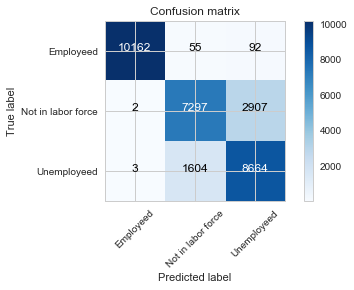

In [37]:
y_pred_ann_train = ann_clf.predict(X_train)
y_pred_ann_valid = ann_clf.predict(X_valid)

ann_acc_train = metrics.accuracy_score(y_train, y_pred_ann_train)
ann_acc_valid = metrics.accuracy_score(y_valid, y_pred_ann_valid)
ann_rp = metrics.classification_report(y_valid, y_pred_ann_valid)
print("_____________________________________________________________")
print("Accuracy score on train data: {:5f}".format(ann_acc_train))
print("Accuracy score on valid data: {:5f}".format(ann_acc_valid))
print("Classification Report:")
print(ann_rp)
print("_____________________________________________________________")

# Compute confusion matrix
cm = confusion_matrix(y_valid, y_pred_ann_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix')
plt.show()

## Support Vector Machine

In [38]:
clf_svc = svm.SVC(kernel = 'rbf', random_state = 121)
clf_svc.fit(X_train, y_train)
y_pred_svc_train = clf_svc.predict(X_train)
y_pred_svc_valid = clf_svc.predict(X_valid)

_____________________________________________________________
Accuracy score on train data: 0.835853
Accuracy score on valid data: 0.839180
Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.95      0.97     10309
          1       0.80      0.73      0.76     10206
          2       0.74      0.84      0.79     10271

avg / total       0.85      0.84      0.84     30786

_____________________________________________________________


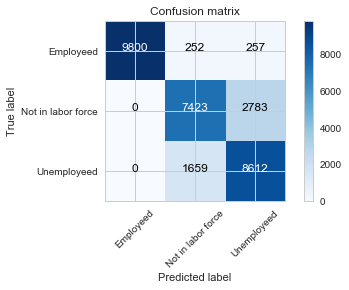

In [39]:
acc_svm_train = metrics.accuracy_score(y_train,y_pred_svc_train)
acc_svm_valid = metrics.accuracy_score(y_valid,y_pred_svc_valid)

svm_rp = metrics.classification_report(y_valid, y_pred_svc_valid)
print("_____________________________________________________________")
print("Accuracy score on train data: {:5f}".format(acc_svm_train))
print("Accuracy score on valid data: {:5f}".format(acc_svm_valid))
print("Classification Report:")
print(svm_rp)
print("_____________________________________________________________")
# Compute confusion matrix
cm_svm = confusion_matrix(y_valid, y_pred_svc_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm_svm, classes=class_names,
                      title='Confusion matrix')
plt.show()

## Adaboost

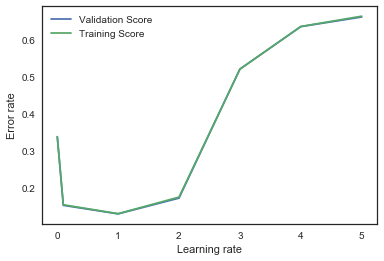

In [40]:
learning_rate = [0.001, 0.1, 1, 2, 3, 4, 5]
error_valid = []
error_train = []

for i in range(0, len(learning_rate)):
    clf_ada = AdaBoostClassifier(algorithm='SAMME.R', learning_rate = learning_rate[i])
    clf_ada = clf_ada.fit(X_train, y_train)
    
    error_valid.append(zero_one_loss(y_valid, clf_ada.predict(X_valid)))
    error_train.append(zero_one_loss(y_train, clf_ada.predict(X_train)))
    
sns.set(style="white")

plt.plot(learning_rate, error_valid)
plt.plot(learning_rate, error_train)

plt.xlabel('Learning rate')
plt.ylabel('Error rate')

plt.legend(['Validation Score', 'Training Score'])

In [41]:
clf_ada = AdaBoostClassifier(algorithm='SAMME.R', learning_rate = 1, random_state = 123)
clf_ada =  clf_ada.fit(X_train, y_train)

print('Error rate is {}%'.format(round(zero_one_loss(y_valid, clf_ada.predict(X_valid)), 2)))

Error rate is 0.13%


_____________________________________________________________
Accuracy score on train data: 0.869938
Accuracy score on valid data: 0.870428
Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     10309
          1       0.82      0.78      0.80     10206
          2       0.79      0.84      0.82     10271

avg / total       0.87      0.87      0.87     30786

_____________________________________________________________


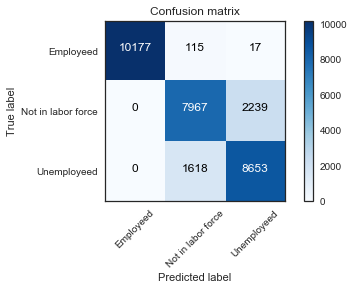

In [42]:
y_pred_ada_train = clf_ada.predict(X_train)
y_pred_ada_valid = clf_ada.predict(X_valid)

ada_acc_train = metrics.accuracy_score(y_train, y_pred_ada_train)
ada_acc_valid = metrics.accuracy_score(y_valid, y_pred_ada_valid)

ada_rp = metrics.classification_report(y_valid, y_pred_ada_valid)
print("_____________________________________________________________")
print("Accuracy score on train data: {:5f}".format(ada_acc_train))
print("Accuracy score on valid data: {:5f}".format(ada_acc_valid))
print("Classification Report:")
print(ada_rp)
print("_____________________________________________________________")

# Compute confusion matrix
cm_ada = confusion_matrix(y_valid, y_pred_ada_valid)
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm_ada, classes=class_names,
                      title='Confusion matrix')
plt.show()

# Discussion

#### From the above models, we found that Random Forest performed the best among all since the f1-score for all levels is greater than 89% and mean f1-score is 93%
#### So, we will go with this model to predict the class for target variable.

# Test data on final Model 

In [43]:
## Load Test data
test_data_xls = pd.read_excel('Test Dataset.xlsx', index_col=None)     # Load the .xlsx file
test_data_xls.to_csv('Test_set.csv', encoding='utf-8', index=False)    # Convert .xlsx to .csv file 
test_df = pd.read_csv("Test_set.csv")                                  # Read Test_set.csv file
test_df.head()

,id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,11th grade,17,0-19,NaN,Male,2,240,2005,22,...,0,0,0,50,145,65,0,0,0,15.000000
1,2,Master,49,40-49,NaN,Female,0,0,2005,0,...,0,0,60,15,570,90,0,0,0,22.500000
2,3,Bachelor,40,40-49,NaN,Male,3,1470,2005,35,...,0,0,45,30,409,409,0,0,0,28.766667
3,4,Bachelor,46,40-49,NaN,Female,2,673,2005,60,...,0,0,130,0,242,60,0,0,0,21.450000
4,5,High School,39,30-39,NaN,Female,2,1385,2005,40,...,0,0,3,5,427,105,0,0,0,22.666667


In [44]:
#Checking missing values in the test dataset
test_df.isnull().sum()

id                            0
Education Level               0
Age                           0
Age Range                     0
Employment Status         33270
Gender                        0
Children                      0
Weekly Earnings               0
Year                          0
Weekly Hours Worked           0
Sleeping                      0
Grooming                      0
Housework                     0
Food & Drink Prep             0
Caring for Children           0
Playing with Children         0
Job Searching                 0
Shopping                      0
Eating and Drinking           0
Socializing & Relaxing        0
Television                    0
Golfing                       0
Running                       0
Volunteering                  0
Total                         0
dtype: int64

In [45]:
# Converting hours into mins since most of the variables are in minutes
df_test = test_df.copy()
df_test['Weekly Hours Worked'] = df_test['Weekly Hours Worked'].apply(lambda x: x*60)  
df_test['Total'] = df_test['Total'].apply(lambda x: x*60)
df_test.head()

,id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,11th grade,17,0-19,NaN,Male,2,240,2005,1320,...,0,0,0,50,145,65,0,0,0,900.0
1,2,Master,49,40-49,NaN,Female,0,0,2005,0,...,0,0,60,15,570,90,0,0,0,1350.0
2,3,Bachelor,40,40-49,NaN,Male,3,1470,2005,2100,...,0,0,45,30,409,409,0,0,0,1726.0
3,4,Bachelor,46,40-49,NaN,Female,2,673,2005,3600,...,0,0,130,0,242,60,0,0,0,1287.0
4,5,High School,39,30-39,NaN,Female,2,1385,2005,2400,...,0,0,3,5,427,105,0,0,0,1360.0


In [46]:
# As mentioned in the dataset some activities are considered twice, so we are taking the max of similar activities
df_test['Household Activity'] = df_test[['Housework', 'Food & Drink Prep']].max(axis=1)
df_test['Primary Children Activity'] = df_test[['Caring for Children','Playing with Children']].max(axis=1)
df_test['Socializing Activity'] = df_test[['Socializing & Relaxing', 'Television']].max(axis=1)
df_test[['Housework', 'Food & Drink Prep','Household Activity']].head() 

,Housework,Food & Drink Prep,Household Activity
0,0,0,0
1,0,0,0
2,0,0,0
3,270,0,270
4,210,40,210


In [47]:
# Dropping the correlated variables and non-predictors
df_test.drop(df_test[['id','Volunteering','Running','Golfing','Age Range','Year','Housework','Food & Drink Prep','Caring for Children','Playing with Children','Socializing & Relaxing','Television']],axis=1, inplace=True)

In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33270 entries, 0 to 33269
Data columns (total 25 columns):
id                        33270 non-null int64
Education Level           33270 non-null object
Age                       33270 non-null int64
Age Range                 33270 non-null object
Employment Status         0 non-null float64
Gender                    33270 non-null object
Children                  33270 non-null int64
Weekly Earnings           33270 non-null int64
Year                      33270 non-null int64
Weekly Hours Worked       33270 non-null int64
Sleeping                  33270 non-null int64
Grooming                  33270 non-null int64
Housework                 33270 non-null int64
Food & Drink Prep         33270 non-null int64
Caring for Children       33270 non-null int64
Playing with Children     33270 non-null int64
Job Searching             33270 non-null int64
Shopping                  33270 non-null int64
Eating and Drinking       33270 non-null int

In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33270 entries, 0 to 33269
Data columns (total 16 columns):
Education Level              33270 non-null object
Age                          33270 non-null int64
Employment Status            0 non-null float64
Gender                       33270 non-null object
Children                     33270 non-null int64
Weekly Earnings              33270 non-null int64
Weekly Hours Worked          33270 non-null int64
Sleeping                     33270 non-null int64
Grooming                     33270 non-null int64
Job Searching                33270 non-null int64
Shopping                     33270 non-null int64
Eating and Drinking          33270 non-null int64
Total                        33270 non-null float64
Household Activity           33270 non-null int64
Primary Children Activity    33270 non-null int64
Socializing Activity         33270 non-null int64
dtypes: float64(2), int64(12), object(2)
memory usage: 4.1+ MB


In [50]:
# Generate dummies for Education Level and Gender
Ed_G_test = df_test[['Education Level','Gender']]
Ed_G_test = pd.get_dummies(Ed_G_test)
df_enc_test = df_test.select_dtypes(exclude=['object']) \
                .join(Ed_G_test)
df_enc_test.head()

,Age,Employment Status,Children,Weekly Earnings,Weekly Hours Worked,Sleeping,Grooming,Job Searching,Shopping,Eating and Drinking,...,Education Level_9th grade,Education Level_Associate Degree,Education Level_Bachelor,Education Level_Doctoral Degree,Education Level_High School,Education Level_Master,Education Level_Prof. Degree,Education Level_Some College,Gender_Female,Gender_Male
0,17,NaN,2,240,1320,570,70,0,0,50,...,0,0,0,0,0,0,0,0,0,1
1,49,NaN,0,0,0,555,60,0,60,15,...,0,0,0,0,0,1,0,0,1,0
2,40,NaN,3,1470,2100,613,10,0,45,30,...,0,0,1,0,0,0,0,0,0,1
3,46,NaN,2,673,3600,550,35,0,130,0,...,0,0,1,0,0,0,0,0,1,0
4,39,NaN,2,1385,2400,570,0,0,3,5,...,0,0,0,0,1,0,0,0,1,0


In [51]:
y_nan = df_enc_test.pop('Employment Status')
X_test = df_enc_test

In [52]:
X_scaled_test = scaler.transform(X_test)

In [53]:
X_scaled_test

array([[0.03, 0.17, 0.08, ..., 0.  , 0.  , 1.  ],
       [0.49, 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.36, 0.25, 0.51, ..., 0.  , 0.  , 1.  ],
       ...,
       [0.84, 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.23, 0.17, 0.29, ..., 0.  , 0.  , 1.  ],
       [0.84, 0.  , 0.  , ..., 1.  , 1.  , 0.  ]])

In [54]:
# Predict the class for test data
y_pred_ran_test = clf_ran.predict(X_test)

In [55]:
y_pred_ran_test_df = pd.DataFrame(data=y_pred_ran_test)

In [56]:
y_pred_ran_test_df['Employment Status'] = y_pred_ran_test_df

In [57]:
y_predicted = y_pred_ran_test_df.pop('Employment Status')

In [58]:
y_predicted.head()

0    0
1    1
2    0
3    0
4    0
Name: Employment Status, dtype: int64

In [59]:
y_predicted.replace([0,1,2],['Employed','Not in labor force','Unemployed'], inplace=True)

In [60]:
y_predicted.head()

0              Employed
1    Not in labor force
2              Employed
3              Employed
4              Employed
Name: Employment Status, dtype: object

In [61]:
y_predicted.value_counts()

Employed              20745
Not in labor force    12438
Unemployed               87
Name: Employment Status, dtype: int64

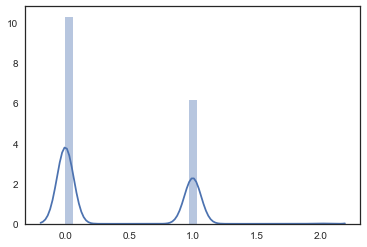

In [62]:
sns.distplot(y_pred_ran_test_df)

In [63]:
testdf = test_df.copy()

In [64]:
test_df.head()

,id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,11th grade,17,0-19,NaN,Male,2,240,2005,22,...,0,0,0,50,145,65,0,0,0,15.000000
1,2,Master,49,40-49,NaN,Female,0,0,2005,0,...,0,0,60,15,570,90,0,0,0,22.500000
2,3,Bachelor,40,40-49,NaN,Male,3,1470,2005,35,...,0,0,45,30,409,409,0,0,0,28.766667
3,4,Bachelor,46,40-49,NaN,Female,2,673,2005,60,...,0,0,130,0,242,60,0,0,0,21.450000
4,5,High School,39,30-39,NaN,Female,2,1385,2005,40,...,0,0,3,5,427,105,0,0,0,22.666667


In [65]:
testdf.drop(labels = "Employment Status", axis =1, inplace = True)

In [66]:
y_predicted = pd.DataFrame(y_predicted)

In [67]:
final_df = pd.concat([testdf,y_predicted], axis =1)

In [68]:
final_df.tail()

,id,Education Level,Age,Age Range,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,Sleeping,...,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total,Employment Status
33265,33266,Some College,37,30-39,Male,0,808,2012,40,360,...,0,0,30,780,0,0,0,0,19.583333,Employed
33266,33267,Bachelor,42,40-49,Male,1,1635,2012,40,570,...,0,120,80,135,135,0,0,0,22.833333,Employed
33267,33268,Associate Degree,74,70-79,Male,0,0,2012,0,705,...,0,0,150,395,245,0,0,0,25.666667,Not in labor force
33268,33269,Bachelor,31,30-39,Male,2,850,2012,47,435,...,0,0,120,355,135,0,20,115,24.416667,Employed
33269,33270,Some College,74,70-79,Female,0,0,2012,0,420,...,0,0,190,465,165,0,0,0,21.133333,Not in labor force


In [69]:
#df_t = pd.concat([df_enc_test,y_predicted], axis = 1)

In [70]:
test_df["Employment Status"].fillna(y_predicted['Employment Status'], inplace=True)

In [71]:
test_df.tail()

,id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
33265,33266,Some College,37,30-39,Employed,Male,0,808,2012,40,...,0,0,0,30,780,0,0,0,0,19.583333
33266,33267,Bachelor,42,40-49,Employed,Male,1,1635,2012,40,...,60,0,120,80,135,135,0,0,0,22.833333
33267,33268,Associate Degree,74,70-79,Not in labor force,Male,0,0,2012,0,...,0,0,0,150,395,245,0,0,0,25.666667
33268,33269,Bachelor,31,30-39,Employed,Male,2,850,2012,47,...,30,0,0,120,355,135,0,20,115,24.416667
33269,33270,Some College,74,70-79,Not in labor force,Female,0,0,2012,0,...,0,0,0,190,465,165,0,0,0,21.133333


In [72]:
test_df.to_csv('Final_Test_Dataset.csv', encoding='utf-8', index=False)